<a href="https://colab.research.google.com/github/oriidearmstrong/Capstone/blob/main/Oriide_Armstrong_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files


uploaded = files.upload()

Saving fish3.xlsx to fish3.xlsx


In [ ]:
import pandas as pd

# DataFrame
data = {
    "Variable": ["Fish Weight (g)", "Water Temp (°C)", "Feed Quantity (g)", "Protein Percentage", "FCR", "Survival Rate (%)", "pH"],
    "Mean": [350, 28.5, 120, 30, 1.6, 90, 7.4],
    "Std Dev": [50, 1.2, 15, 2.5, 0.2, 5, 0.3],
    "Min": [280, 26.0, 95, 25, 1.3, 80, 6.8],
    "Max": [420, 30.5, 150, 35, 2.0, 98, 8.0]
}

stats = pd.DataFrame(data)

# Display the DataFrame
print(stats)




             Variable   Mean  Std Dev    Min    Max
0     Fish Weight (g)  350.0     50.0  280.0  420.0
1     Water Temp (°C)   28.5      1.2   26.0   30.5
2   Feed Quantity (g)  120.0     15.0   95.0  150.0
3  Protein Percentage   30.0      2.5   25.0   35.0
4                 FCR    1.6      0.2    1.3    2.0
5   Survival Rate (%)   90.0      5.0   80.0   98.0
6                  pH    7.4      0.3    6.8    8.0


Saving fish3.xlsx to fish3 (8).xlsx
                     count          mean           std         min  \
Harvest_Wt           302.0    446.860681    176.046423    3.357626   
Protein Percentage   302.0      0.307086      0.062602    0.000000   
UTD Feed (kg)        302.0  94812.162252  46659.690711    0.000000   
UTD Biol. FCR        302.0      1.295217      0.457182   -2.459483   
LTD Survival %       302.0     61.748163     20.796152    0.409821   
Day Degrees          302.0   5885.609636   1696.294421  389.760000   
LTD Days of Culture  302.0    226.834437     65.654631   14.000000   
UTD Mortality %      302.0      4.654205      4.843407    0.000000   

                              25%           50%            75%            max  
Harvest_Wt             396.128195    445.466222     507.673627     869.597292  
Protein Percentage       0.320000      0.320000       0.320000       0.320000  
UTD Feed (kg)        81021.250000  98427.500000  113183.500000  223320.000000  
UTD Biol. FCR

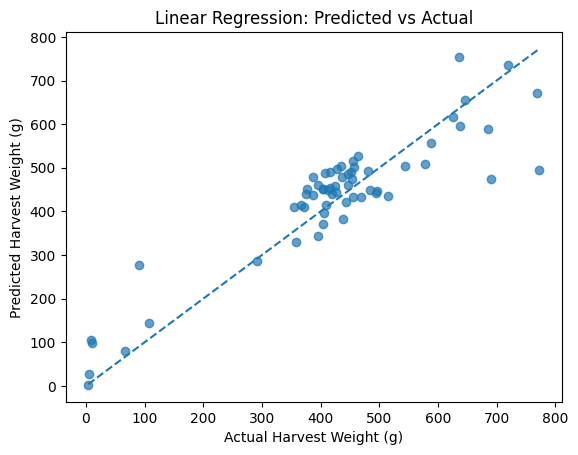

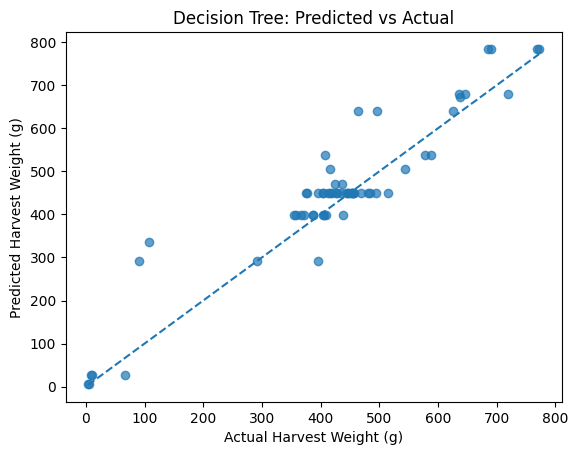

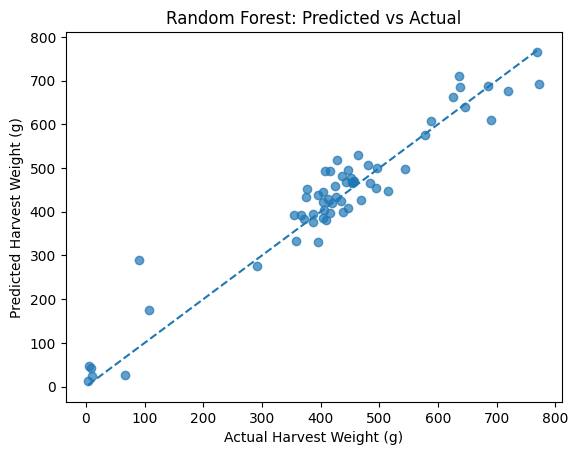

                         R²       RMSE
Linear Regression  0.825143  72.343295
Decision Tree      0.860110  64.706796
Random Forest      0.921895  48.349821


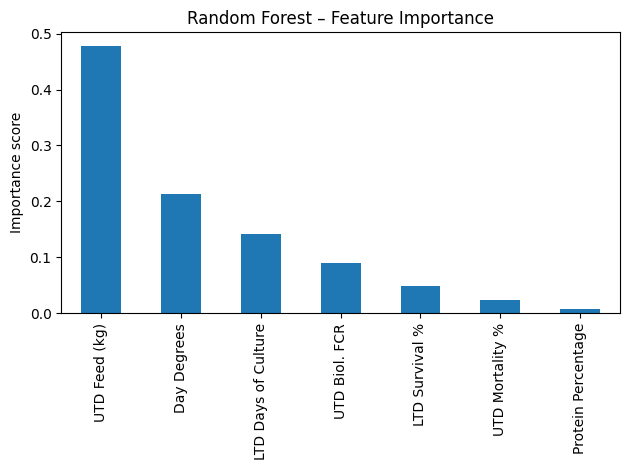

In [ ]:
# ────────────────────────────────────────────────────────────────────────────────
# 1. FILE UPLOAD ─ choose fish3.xlsx when prompted
# ────────────────────────────────────────────────────────────────────────────────
from google.colab import files
uploaded = files.upload()            # select fish3.xlsx
fname = next(iter(uploaded))         # grab the filename

# ────────────────────────────────────────────────────────────────────────────────
# 2. PACKAGE IMPORTS
# ────────────────────────────────────────────────────────────────────────────────
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ────────────────────────────────────────────────────────────────────────────────
# 3. LOAD DATA
# ────────────────────────────────────────────────────────────────────────────────
df = pd.read_excel(fname)

# ────────────────────────────────────────────────────────────────────────────────
# 4. DESCRIPTIVE STATISTICS
# ────────────────────────────────────────────────────────────────────────────────
cols = ['Harvest Av. Wt. (gr)', 'Protein Percentage', 'UTD Feed (kg)',
        'UTD Biol. FCR', 'LTD Survival %', 'Day Degrees',
        'LTD Days of Culture', 'UTD Mortality %']

data = df[cols].copy().rename(columns={'Harvest Av. Wt. (gr)': 'Harvest_Wt'})
print(data.describe().T)             # or display() if available

# ────────────────────────────────────────────────────────────────────────────────
# 5. MODELLING (predict Harvest_Wt)
# ────────────────────────────────────────────────────────────────────────────────
X = data.drop('Harvest_Wt', axis=1)
y = data['Harvest_Wt']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=42)

models = {
    'Linear Regression':
        make_pipeline(SimpleImputer(strategy='median'),
                       StandardScaler(),
                       LinearRegression()),
    'Decision Tree':
        DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest':
        RandomForestRegressor(n_estimators=200, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        'R²'  : r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))  # ← FIXED
    }

    # diagnostic scatter
    plt.figure()
    plt.scatter(y_test, y_pred, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()], '--')
    plt.xlabel('Actual Harvest Weight (g)')
    plt.ylabel('Predicted Harvest Weight (g)')
    plt.title(f'{name}: Predicted vs Actual')
    plt.show()

# ────────────────────────────────────────────────────────────────────────────────
# 6. METRIC SUMMARY + FEATURE IMPORTANCE
# ────────────────────────────────────────────────────────────────────────────────
print(pd.DataFrame(results).T)

rf = models['Random Forest']
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Importance score')
plt.title('Random Forest – Feature Importance')
plt.tight_layout()
plt.show()
